In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn import metrics

In [2]:
# Read dataset into dataframe
col_names = ["Passenger", "Class", "Sex", "Age", "Survived"]
titanic = pd.read_csv('Titanic.csv',
                            header=0, names=col_names)

In [3]:
# Drop factor(s) that are not important for regression
titanic = titanic.drop("Passenger", axis=1)

In [4]:
# Check for missing values
print(titanic.isnull().any())

Class       False
Sex         False
Age         False
Survived    False
dtype: bool


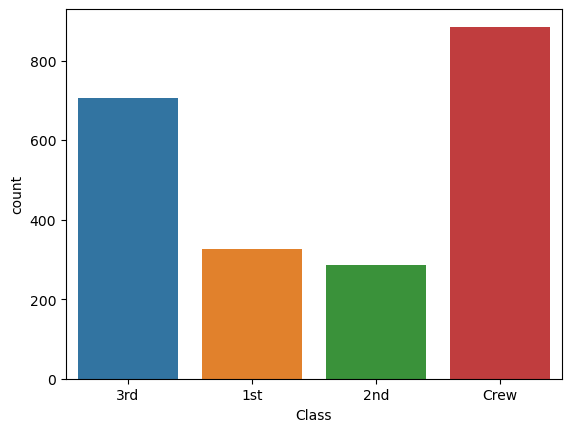

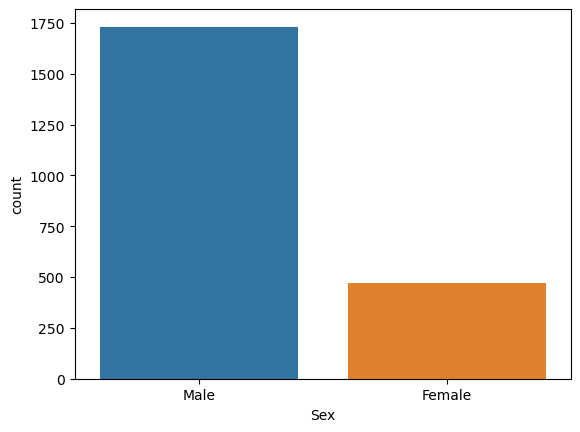

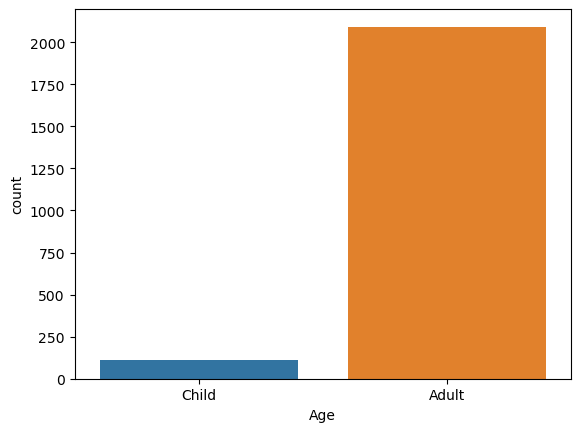

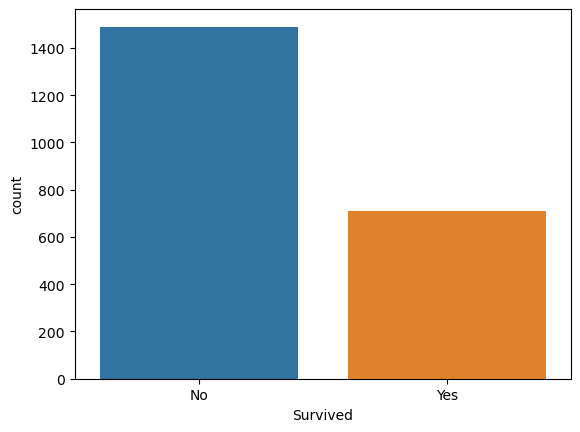

In [5]:
# Plot count plots of each remaining factors
class_plot = sns.countplot(x="Class", data = titanic)
plt.show()
sex_plot = sns.countplot(x="Sex", data = titanic)
plt.show()
age_plot = sns.countplot(x="Age", data = titanic)
plt.show()
survived_plot = sns.countplot(x="Survived", data = titanic)
plt.show()

In [6]:
titanic = titanic.replace({"No": 0, "Yes": 1})
titanic_y = titanic['Survived']
titanic_x = titanic.drop("Survived", axis=1)

In [7]:
# Convert categorical features into dummy variables
ax = pd.get_dummies(titanic_x['Class'])
ay = pd.get_dummies(titanic_x['Sex'])
az = pd.get_dummies(titanic['Age'])
titanic_x = pd.concat([titanic_x, ax, ay, az], axis=1)
titanic_x = titanic_x.drop(["Class", "Sex", "Age"], axis=1)
print(titanic_x)

      1st  2nd  3rd  Crew  Female  Male  Adult  Child
0       0    0    1     0       0     1      0      1
1       0    0    1     0       0     1      0      1
2       0    0    1     0       0     1      0      1
3       0    0    1     0       0     1      0      1
4       0    0    1     0       0     1      0      1
...   ...  ...  ...   ...     ...   ...    ...    ...
2196    0    0    0     1       1     0      1      0
2197    0    0    0     1       1     0      1      0
2198    0    0    0     1       1     0      1      0
2199    0    0    0     1       1     0      1      0
2200    0    0    0     1       1     0      1      0

[2201 rows x 8 columns]


In [8]:
# Partition the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(titanic_x, titanic_y,
                                                    test_size=0.3, random_state=2021)

In [9]:
# Fit data to logistic regression model
logReg = LogisticRegression(max_iter=1000)
logReg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# accuracy of predictions
y_pred = logReg.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7715582450832073


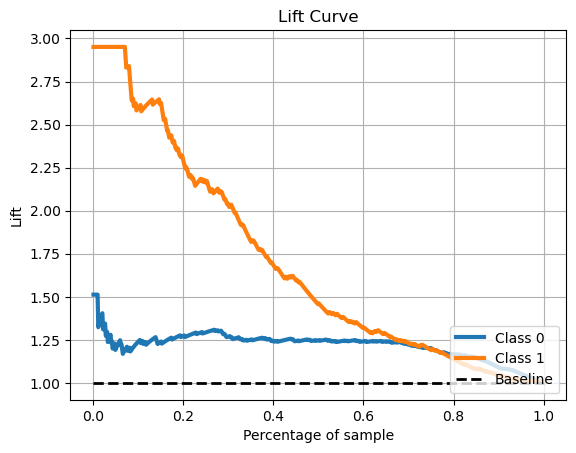

In [11]:
# Plot the lift curve
y_probas = logReg.predict_proba(x_test)
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

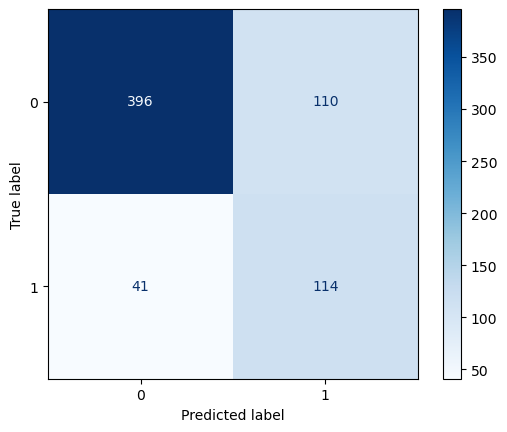

In [12]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(y_pred, y_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [13]:
# Predict the value of survivability
d = {'1st': [0], '2nd': [0], '3rd': [1], 'Crew': [0], 'Female': [0],
      'Male': [1], 'Adult': [1], 'Child': [0]}
df = pd.DataFrame(data=d)
print("Predicted Outcome:", logReg.predict(df))

Predicted Outcome: [0]
